# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

survey = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
metadata = pd.read_csv('schema.csv')
survey.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [2]:
#Your code here
ed_comp = survey[['FormalEducation','AdjustedCompensation']].copy().dropna()

import scipy
from flatiron_stats import welch_t, welch_df, p_value_welch_ttest

bach = ed_comp[ed_comp['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation'].copy()
mast = ed_comp[ed_comp['FormalEducation'] == "Master's degree"]['AdjustedCompensation'].copy()

flatiron_p = p_value_welch_ttest(mast, bach)

results = scipy.stats.ttest_ind(mast, bach, equal_var=False)
t_stat = results[0]
one_sided_p = results[1] / 2
print(f'Flatiron test p-value: {flatiron_p} | Scipy t-test p-value: {one_sided_p}')

Flatiron test p-value: 0.33077639451272445 | Scipy t-test p-value: 0.33077639451272445


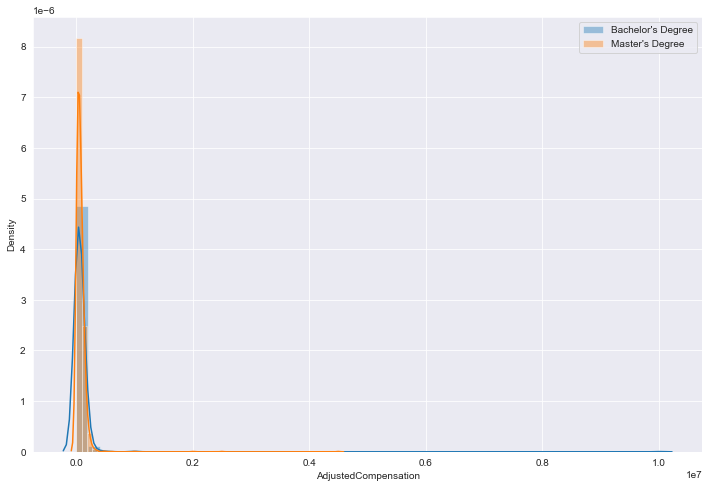

In [3]:
# Distribution Visualization

plt.figure(figsize=(12,8))
sns.distplot(bach, label="Bachelor's Degree")
sns.distplot(mast, label="Master's Degree")
plt.legend();

In [4]:
bach_data = {}
mast_data = {}

for data in [(bach_data, bach), (mast_data, mast)]:
    data[0]['median'] = round(data[1].median(), 2)
    data[0]['mean'] = round(data[1].mean(), 2)
    data[0]['sd'] = round(data[1].std(), 2)
    data[0]['sample_size'] = round(len(data[1]), 2)

In [5]:
print(f"Median values: \tB: {bach_data['median']} | M: {mast_data['median']}")
print(f"Mean values: \tB: {bach_data['mean']} | M: {mast_data['mean']}")
print(f"Std. Dev.: \tB: {bach_data['sd']} | M: {mast_data['sd']}")
print(f"Sample size: \tB: {bach_data['sample_size']} | M: {mast_data['sample_size']}")
print(f"Welch's t-test p-value: {flatiron_p}")

Median values: 	B: 38399.4 | M: 53812.17
Mean values: 	B: 64887.1 | M: 69139.9
Std. Dev.: 	B: 306935.87 | M: 135527.21
Sample size: 	B: 1107 | M: 1990
Welch's t-test p-value: 0.33077639451272445


In [6]:
# Check out percentiles 50-100
for q in range(50,101):
    print(f"{q/100}th percentile: B:{round(bach.quantile(q=q/100),0)} | M:{round(mast.quantile(q=q/100), 0)} ")

0.5th percentile: B:38399.0 | M:53812.0 
0.51th percentile: B:40000.0 | M:53847.0 
0.52th percentile: B:40662.0 | M:55028.0 
0.53th percentile: B:43083.0 | M:56940.0 
0.54th percentile: B:45000.0 | M:59791.0 
0.55th percentile: B:46704.0 | M:59791.0 
0.56th percentile: B:48000.0 | M:60000.0 
0.57th percentile: B:50000.0 | M:61940.0 
0.58th percentile: B:50120.0 | M:63756.0 
0.59th percentile: B:52985.0 | M:65000.0 
0.6th percentile: B:55000.0 | M:66209.0 
0.61th percentile: B:57658.0 | M:68000.0 
0.62th percentile: B:58661.0 | M:70000.0 
0.63th percentile: B:60000.0 | M:71052.0 
0.64th percentile: B:61036.0 | M:71750.0 
0.65th percentile: B:62456.0 | M:73859.0 
0.66th percentile: B:65000.0 | M:75000.0 
0.67th percentile: B:65770.0 | M:77470.0 
0.68th percentile: B:67950.0 | M:79000.0 
0.69th percentile: B:70000.0 | M:80000.0 
0.7th percentile: B:71750.0 | M:83000.0 
0.71th percentile: B:73630.0 | M:84402.0 
0.72th percentile: B:75000.0 | M:86000.0 
0.73th percentile: B:77729.0 | M:8895

In [7]:
# Check very high compensation value thresholds
# To see how many values are above certain compensation amounts
for threshold in range(250000, 1000001, 50000):
    print(f"> {threshold}: B: {len(bach[bach>threshold])} | M: {len(mast[mast>threshold])}")

> 250000: B: 11 | M: 17
> 300000: B: 10 | M: 10
> 350000: B: 8 | M: 7
> 400000: B: 5 | M: 7
> 450000: B: 5 | M: 7
> 500000: B: 4 | M: 5
> 550000: B: 3 | M: 5
> 600000: B: 3 | M: 4
> 650000: B: 3 | M: 4
> 700000: B: 3 | M: 4
> 750000: B: 3 | M: 4
> 800000: B: 3 | M: 4
> 850000: B: 3 | M: 4
> 900000: B: 3 | M: 4
> 950000: B: 3 | M: 4
> 1000000: B: 1 | M: 3


In [8]:
# Thus, I'll cut off above 300,000; this leaves off 10 entries for each category
# 10 entries is less than 1% of either category

bach_cutoff = bach[bach<=300000].copy()
mast_cutoff = mast[mast<=300000].copy()

In [9]:
# Re-run t-test, and check values:

flatiron_p = p_value_welch_ttest(bach_cutoff, mast_cutoff)

for data in [(bach_data, bach_cutoff), (mast_data, mast_cutoff)]:
    data[0]['median'] = round(data[1].median(), 2)
    data[0]['mean'] = round(data[1].mean(), 2)
    data[0]['sd'] = round(data[1].std(), 2)
    data[0]['sample_size'] = round(len(data[1]), 2)

print(f"Median values: \tB: {bach_data['median']} | M: {mast_data['median']}")
print(f"Mean values: \tB: {bach_data['mean']} | M: {mast_data['mean']}")
print(f"Std. Dev.: \tB: {bach_data['sd']} | M: {mast_data['sd']}")
print(f"Sample size: \tB: {bach_data['sample_size']} | M: {mast_data['sample_size']}")
print(f"Welch's t-test p-value: {flatiron_p}")

Median values: 	B: 37488.0 | M: 53248.45
Mean values: 	B: 51968.52 | M: 63123.54
Std. Dev.: 	B: 49806.08 | M: 52637.46
Sample size: 	B: 1097 | M: 1980
Welch's t-test p-value: 3.1432543234899413e-09


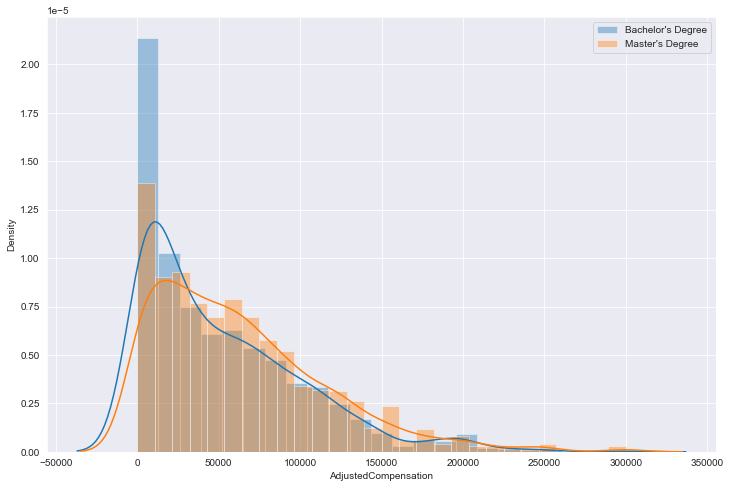

In [10]:
# Check distribution of samples w/o outliers

plt.figure(figsize=(12,8))
sns.distplot(bach_cutoff, label="Bachelor's Degree")
sns.distplot(mast_cutoff, label="Master's Degree")
plt.legend();

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [11]:
#Your code here
bach = ed_comp[ed_comp['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation'].copy()
doct = ed_comp[ed_comp['FormalEducation'] == "Doctoral degree"]['AdjustedCompensation'].copy()

In [12]:
# Raw data analysis

flatiron_p = p_value_welch_ttest(bach, doct)

bach_data = {}
doct_data = {}

for data in [(bach_data, bach), (doct_data, doct)]:
    data[0]['median'] = round(data[1].median(), 2)
    data[0]['mean'] = round(data[1].mean(), 2)
    data[0]['sd'] = round(data[1].std(), 2)
    data[0]['sample_size'] = round(len(data[1]), 2)

print(f"Median values: \tB: {bach_data['median']} | D: {doct_data['median']}")
print(f"Mean values: \tB: {bach_data['mean']} | D: {doct_data['mean']}")
print(f"Std. Dev.: \tB: {bach_data['sd']} | D: {doct_data['sd']}")
print(f"Sample size: \tB: {bach_data['sample_size']} | D: {doct_data['sample_size']}")
print(f"Welch's t-test p-value: {flatiron_p}")

Median values: 	B: 38399.4 | D: 74131.92
Mean values: 	B: 64887.1 | D: 29566175.76
Std. Dev.: 	B: 306935.87 | D: 909998082.33
Sample size: 	B: 1107 | D: 967
Welch's t-test p-value: 0.15682381994720251


In [13]:
# Let's try with the same cutoff

threshold = 300000

b2 = bach[bach<=300000]
d2 = doct[doct<=300000]

flatiron_p = p_value_welch_ttest(b2, d2)

for data in [(bach_data, b2), (doct_data, d2)]:
    data[0]['median'] = round(data[1].median(), 2)
    data[0]['mean'] = round(data[1].mean(), 2)
    data[0]['sd'] = round(data[1].std(), 2)
    data[0]['sample_size'] = round(len(data[1]), 2)

print(f"Median values: \tB: {bach_data['median']} | D: {doct_data['median']}")
print(f"Mean values: \tB: {bach_data['mean']} | D: {doct_data['mean']}")
print(f"Std. Dev.: \tB: {bach_data['sd']} | D: {doct_data['sd']}")
print(f"Sample size: \tB: {bach_data['sample_size']} | D: {doct_data['sample_size']}")
print(f"Welch's t-test p-value: {flatiron_p}")

Median values: 	B: 37488.0 | D: 72266.16
Mean values: 	B: 51968.52 | D: 83440.21
Std. Dev.: 	B: 49806.08 | D: 59719.83
Sample size: 	B: 1097 | D: 954
Welch's t-test p-value: 0.0


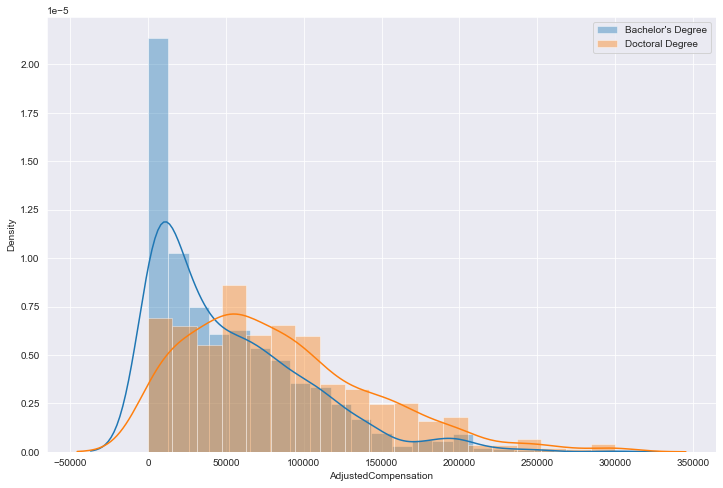

In [14]:
# Check distribution of samples w/o outliers

plt.figure(figsize=(12,8))
sns.distplot(b2, label="Bachelor's Degree")
sns.distplot(d2, label="Doctoral Degree")
plt.legend();

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [15]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, ed_comp).fit()

In [16]:
table = sm.stats.anova_lm(lm, typ=2)
display(table)

,sum_sq,df,F,PR(>F)
C(FormalEducation),6.540294e+17,6.0,0.590714,0.738044
Residual,7.999414e+20,4335.0,NaN,NaN


In [17]:
# Now without outliers

df = ed_comp[ed_comp['AdjustedCompensation'] <= threshold]
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
display(table)

,sum_sq,df,F,PR(>F)
C(FormalEducation),5.306853e+11,6.0,30.558557,4.061426e-36
Residual,1.244287e+13,4299.0,NaN,NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!